In [1]:
import pandas as pd
import numpy as np
# from pandas_profiling import ProfileReport
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

# Checkpoint 1 : Data Loading & Cleaning

In this, we would load the data files and run a couple of operations as listed below -
1. Check for Special Characters & Encoding in Files
2. Check for Missing Values and if they can be imputed.
3. Final available dataset with uniqueness,

### Companies Data

In [2]:
# As company is a text file which is tab separated & is not utf-8 encoded
companies = pd.read_csv("data/companies.txt",sep='\t',engine='python')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Glamit,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [4]:
# Checking Null Values
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [5]:
# Handling Encode & Special Characters
# Also converting to lowercase to keep application case insensitive
# referred the stackoverflow link mentioned in the problem description.

companies['permalink']=companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['permalink'] =  companies['permalink'].str.lower()
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/incubes,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


### Rounds

In [6]:
rounds2 = pd.read_csv("data/rounds2.csv",engine='python')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
# Checking Null Values
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [8]:
# Handling Special Characters & Encoded Characters, so that it's consistent with Companies. 
#Lowercasing  to make operations case insensitive

rounds2['company_permalink']=rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
rounds2['funding_round_permalink']=rounds2[['funding_round_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 
                                                                                                                    'ignore'))
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

### Mappings

In [9]:
mapping = pd.read_csv("data/mapping.csv",engine='python')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


It's observed that many places have a "0" instead of na or Na depending on the position of the occurence. 
Fixing that in the data processing below.

Example : 0notechnology should be NanoTechnology

In [10]:
def correctMapping0(category):
    """ Corrects mapping data to handle occurence of ) instead of "na" in category field
        Eg. 'Analysis' is present as 'A0lysis'
    """
    # Handling nan cases
    if category != category:
        return category
    elif '0' in category:
        if category.startswith("0"):    # Handle 0notechnology case with capital Na
            return category.replace("0", "Na")
        elif category.endswith("0"):    # the 2.0 case is ignore, with 0 at the end of the string
            return category
        else:
            return category.replace("0", "na") # in between text
    else:
        return category

In [11]:
# calling the custom function to correct the category_list column in the mapping.
mapping['category_list']=mapping['category_list'].apply(lambda x :correctMapping0(x) )

In [12]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


### Analysis

Table 1.1: Understand the Data Set

1. How many unique companies are present in rounds2?

2. How many unique companies are present in companies?

3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.How many observations are present in master_frame?

In [13]:
# 1. How many unique companies are present in rounds2?
unique_company_rounds_count = rounds2['company_permalink'].nunique()
print("Unique Companies in Rounds 2 : {}".format(unique_company_rounds_count))

Unique Companies in Rounds 2 : 66368


In [14]:
# 2. How many unique companies are present in rounds2?
companies['permalink'] = companies['permalink'].str.lower()
unique_company_count = companies['permalink'].nunique()
print("Unique Companies in Companies : {}".format(unique_company_count))

Unique Companies in Companies : 66368


In [15]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/incubes,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


**Question 3 :** In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

**Answer** : From the above it's visible that the **permalink** column in companies has all unique values, hence it is selected as the Unique Key for each company

Also, from the above it is evident, that companies dataframe is unique and hence we cannot do any imputation for fields like **country_code** / **category_list** .
Though we can also observe, that permalink has encoded characters that we should fix so that we don't lose any information while merging it later.

In [16]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/incubes,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


As comapnies dataset shape is same as unique values in "permalink", It's the unique Key

In [17]:
# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
unique_comp_rounds2 = set(list(rounds2['company_permalink']))
unique_comp_companies = set(list(companies['permalink']))

# Set Subtraction
diff = unique_comp_rounds2 - unique_comp_companies
diff

set()

**Answer** : **N** .They don't have different companies

In [18]:
# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
# Name the merged frame master_frame.How many observations are present in master_frame?

master_frame = pd.merge(rounds2,companies,
                       left_on="company_permalink",
                       right_on= "permalink")
print("Shape : {}".format(master_frame.shape))
print("Number of Observation : {}".format(master_frame.shape[0]))

print("Total investment : {}".format(master_frame['raised_amount_usd'].sum()))
print("Unique Countries : {}".format(master_frame['country_code'].nunique()))
print("Closed Startups : {}".format(master_frame[master_frame.status=="closed"].shape[0]))

Shape : (114949, 16)
Number of Observation : 114949
Total investment : 990125085135.0
Unique Countries : 137
Closed Startups : 8725


In [19]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [20]:
print("Startup Status : {}".format(master_frame['status'].unique()))
print("Master Data Shape : {}".format(master_frame.shape))
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

Startup Status : ['operating' 'acquired' 'closed' 'ipo']
Master Data Shape : (114949, 16)


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

As we know, it's not possible for us to impute **country_code**,**raised_amount_usd** & **category_list** fields. Also, here we see the Startup Operating Status as closed. 
Here, I make a cognitive decision of dropping all information of Investments in which Startups are closed, as they were bad investments with low or no returns. Also, I drop all rows with No **country_code**,**raised_amount_usd**  as it might effect Average of Country investment further.

I still retain NULL **category_list** as it might still have investment amount on country level or number of investments

In [21]:
master_frame = master_frame[master_frame['status']!='closed']
master_frame = master_frame[~master_frame['country_code'].isna()]
master_frame = master_frame[~master_frame['raised_amount_usd'].isna()]

In [22]:
print("Startup Status : {}".format(master_frame['status'].unique()))
print("Master Data Shape : {}".format(master_frame.shape))
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

Startup Status : ['operating' 'acquired' 'ipo']
Master Data Shape : (83277, 16)


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.75
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.74
category_list               0.52
status                      0.00
country_code                0.00
state_code                  1.94
region                      1.31
city                        1.31
founded_at                 14.62
dtype: float64

# Checkpoint 2 :  Funding Type Analysis

In this section we will analse the funding types, and try to figure out a Funding Type(FT) that is most suited for Sparks Funds

**Table 2.1**: Average Values of Investments for Each of these Funding Types
1. Average funding amount of venture type
2. Average funding amount of angel type
3. Average funding amount of seed type
4. Average funding amount of private equity type
5. Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it?

In [23]:
# We Aggregate over the Funding Type & Sort the values in decending order of average investment in each Funding Type
funding_aggregate = master_frame.groupby(["funding_round_type"],
                                         as_index=False).agg({'company_permalink':'count','raised_amount_usd':'mean'})
funding_aggregate.rename(columns = {"raised_amount_usd":"mean_raised_amount_usd"},inplace=True)
funding_aggregate.sort_values(by="mean_raised_amount_usd",ascending=False,inplace=True)
funding_aggregate

,funding_round_type,company_permalink,mean_raised_amount_usd
6,post_ipo_debt,138,1.754697e+08
10,secondary_market,25,9.408940e+07
8,private_equity,1731,7.579720e+07
7,post_ipo_equity,547,6.709361e+07
2,debt_financing,6126,1.789101e+07
12,undisclosed,1292,1.601821e+07
13,venture,44949,1.190315e+07
4,grant,1862,4.286180e+06
9,product_crowdfunding,321,1.521050e+06
1,convertible_note,1275,1.340013e+06


In [24]:
# 1. Average funding amount of venture type
print("Venture Type Funding : {}".format(funding_aggregate[
                                            funding_aggregate.funding_round_type=="venture"]["mean_raised_amount_usd"].values[0]))
# 2. Average funding amount of angel type
print("Angel Type Funding : {}".format(funding_aggregate[
                                            funding_aggregate.funding_round_type=="angel"]["mean_raised_amount_usd"].values[0]))
# 3.Average funding amount of seed type
print("Seed Type Funding : {}".format(funding_aggregate[
                                            funding_aggregate.funding_round_type=="seed"]["mean_raised_amount_usd"].values[0]))
# 4. Average funding amount of private equity type
print("private Equity Type Funding : {}".format(funding_aggregate[
                                            funding_aggregate.funding_round_type=="private_equity"]["mean_raised_amount_usd"].values[0]))

Venture Type Funding : 11903152.587020846
Angel Type Funding : 994755.1858362632
Seed Type Funding : 763097.3286635759
private Equity Type Funding : 75797198.41478914


Since, only **Venture Funding Type (FT)** is in the range on 5 Million USD to 15 Million USD. I would be recommending that to the Spark Funds

# Checkpoint 3 : Country Analysis

In this section, we want to figure out the top countries to invest in based on the trends & language spoken
TABLE 3.1
For this referred attached pdf for list of english speaking countries

In [25]:
country_funding_type = master_frame[(master_frame.funding_round_type=="venture")                                   ]
country_funding = country_funding_type.groupby(["country_code"],as_index=False).agg({
                                    'company_permalink':'count',
                                    'raised_amount_usd':'sum'}
                                    ).sort_values(by="raised_amount_usd",ascending=False)
# top 9 country_funding as the Dataframe is Sorted
top9 = country_funding.iloc[0:9]
top9

,country_code,company_permalink,raised_amount_usd
94,USA,33745,3.999351e+11
15,CHN,1523,3.910177e+10
29,GBR,1904,1.824134e+10
39,IND,797,1.405060e+10
12,CAN,1153,8.825487e+09
28,FRA,864,6.775044e+09
42,ISR,746,6.503021e+09
21,DEU,528,6.061141e+09
45,JPN,266,3.242032e+09


In [26]:
# Loading Excel of English Speaking countries
eng_country= pd.read_excel("data/english_speaking_country.xlsx")
top_eng = pd.merge(top9,eng_country[["Code"]],
                  left_on="country_code",
                  right_on="Code")
top_eng

,country_code,company_permalink,raised_amount_usd,Code
0,USA,33745,3.999351e+11,USA
1,GBR,1904,1.824134e+10,GBR
2,IND,797,1.405060e+10,IND
3,CAN,1153,8.825487e+09,CAN


In [27]:
# Top 3 Countries based on our Analysis for Investment for Spark Funds
count = 0
print("Top 3 English Speaking Country for Venture Type Investmets are : ")

for index in top_eng.index :
    count +=1
    # Total Investment in Range of %M to 15 USD & Veture type fund
    country_code = top_eng.loc[index,"country_code"]
    top = master_frame[(master_frame.country_code == country_code) &
                       (master_frame.funding_round_type == "venture") &
                       (master_frame.raised_amount_usd >= 5000000) &
                       (master_frame.raised_amount_usd <= 15000000) ]
    investment = top['raised_amount_usd'].sum()
    investment_count = top.shape[0]
    print("Country : {} || Investment : {} || Investment Count : {} ".format(country_code,investment,investment_count))
    
    if count == 3:
        break

Top 3 English Speaking Country for Venture Type Investmets are : 
Country : USA || Investment : 101545266754.0 || Investment Count : 11344 
Country : GBR || Investment : 5093543406.0 || Investment Count : 587 
Country : IND || Investment : 2847673602.0 || Investment Count : 317 


# Checkpoint 4 : Creating Sector Mapping

In this section, we try to map investments to particular categories. 
This will help us analyse which sectors attract more investment

In [28]:
# Adding Primary Category via String Operation in Master Frame

master_frame["category_list"]= master_frame["category_list"].apply(str)
master_frame["primary_category"] = master_frame["category_list"].apply(lambda x : x.split("|")[0])
# master_frame["primary_category"]

In [29]:
#Creating a new DataFrame to Store the mapping
cat_sect_df = pd.DataFrame()
cat_sect_df["primary_category"]  = mapping["category_list"] # Adding the Primary Category

mapping_copy = mapping.copy(deep=True) # creating a copy
mapping_copy.pop("category_list") # removing categories as we have it stored in cat_sec_df
cols = mapping_copy.columns # Storing Column names 
sectors = mapping_copy.apply(lambda x: x > 0) # Creating Filter of True/False based on value
cat_sect_df["main_sector"] = sectors.apply(lambda x: list(cols[x.values])[0], axis=1) # Selecting the True Columns from Cols forevery row

# Is the merged DataFrame
cat_sect_df

,primary_category,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
...,...,...
683,Wholesale,Others
684,Wine And Spirits,Entertainment
685,Wireless,Entertainment
686,Women,Others


In [30]:
# Merging with the Master Data Base for every investment
master_frame= pd.merge(master_frame,cat_sect_df,
                      how="left")
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,"News, Search and Messaging"
3,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games,Entertainment
4,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Cleantech / Semiconductors


In [31]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83277 entries, 0 to 83276
Data columns (total 18 columns):
company_permalink          83277 non-null object
funding_round_permalink    83277 non-null object
funding_round_type         83277 non-null object
funding_round_code         25193 non-null object
funded_at                  83277 non-null object
raised_amount_usd          83277 non-null float64
permalink                  83277 non-null object
name                       83277 non-null object
homepage_url               80164 non-null object
category_list              83277 non-null object
status                     83277 non-null object
country_code               83277 non-null object
state_code                 81660 non-null object
region                     82186 non-null object
city                       82189 non-null object
founded_at                 71098 non-null object
primary_category           83277 non-null object
main_sector                82789 non-null object
dtypes: 

In [32]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.75
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.74
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.94
region                      1.31
city                        1.31
founded_at                 14.62
primary_category            0.00
main_sector                 0.59
dtype: float64

In [33]:
total_investment = master_frame['raised_amount_usd'].sum()
null_sector_investment = master_frame[master_frame.main_sector!=master_frame.main_sector]['raised_amount_usd'].sum()

print("Fraction of investment without any Main Sector : {}".format(null_sector_investment/total_investment))

Fraction of investment without any Main Sector : 0.005664611987072076


We can see that all primary categories have not been mapped to a main_sector.
We see these categories below. We can map them to `Other` sectors, but here I decide to ignore such investments as they form a very small sub-section & investment amount.


In [34]:
# List of Categories that are not Mapped to any Sector
master_frame[master_frame.main_sector != master_frame.main_sector].primary_category.unique()

array(['nan', 'Cause Marketing', 'Real Estate Investors',
       'English-Speaking', 'Toys', 'Generation Y-Z',
       'Enterprise Hardware', 'Social Media Advertising',
       'Natural Gas Uses', 'Internet Technology', 'Nightlife',
       'Adaptive Equipment', 'Internet TV', 'Skill Gaming',
       'Specialty Retail', 'Swimming', 'Registrars', 'Golf Equipment',
       'Biotechnology and Semiconductor', 'Vacation Rentals',
       'Google Glass', 'Rapidly Expanding', 'Group Email', 'Kinect',
       'Spas', 'Sex Industry', 'Psychology', 'GreenTech', 'Lingerie',
       'Mobile Emergency&Health', 'Sponsorship',
       'Deep Information Technology'], dtype=object)

# Checkpoint 5 : Sector Analysis 2

In thsi section we aim to analyse the top 3 sectors for each top 3 country that we suggested in Checkpoint 4.
Below I create two functions to make the code modular and reusable for any country.

In [35]:
def top_country(country_code,master_frame) :
    """
    Performs the below manipulations :
    1. Filters Data for a specific country in range of 5 Million to 15 Million USD
    2. Aggregates over main sector, the amount and number of investments
    3. Merges with the filtered country dataframe D
    """
    top = master_frame[(master_frame.country_code == country_code) &
                   (master_frame.funding_round_type == "venture") &
                   (master_frame.raised_amount_usd >= 5000000) &
                   (master_frame.raised_amount_usd <= 15000000) ]
#     print(top.shape)
    country_analysis = top.groupby("main_sector",as_index=False).agg({'raised_amount_usd':'sum','company_permalink':'count'})
    country_analysis.rename(columns = {'raised_amount_usd':'sector_raised_amount',
                                       'company_permalink':'total_investment_round'}, inplace = True)
    country_analysis.sort_values(by="total_investment_round",ascending=False,inplace=True)

    D =  pd.merge(top,country_analysis,how="left",
               left_on = "main_sector",
               right_on = "main_sector")
    
    return D,country_analysis


def top_company(D,sector) :
    """
    Performs the below manipulations :
    1. Filters Country dataframe D for the given input sector
    2. Aggregates Amount invested per company in the sector
    3. Returns the Comapny name & Investment AMount for the company which recived maximum investment
    """
    D_sector = D[D.main_sector == sector]
    D_raised_amount = D_sector.groupby("company_permalink",as_index=False)["raised_amount_usd"].sum()
    D_raised_amount.sort_values(by="raised_amount_usd",ascending=False,inplace=True)
    
    company_name = D_raised_amount["company_permalink"].tolist()[0]
    return company_name,D_raised_amount

In [36]:
print("Country 1  : USA")
D1,country_analysis = top_country(country_code ="USA",master_frame=master_frame)
top3_sectors =  country_analysis["main_sector"].tolist()[0:3]
print("Top 3 Sectors based on Number of Investments : {}".format(top3_sectors))
top2_sectors = country_analysis["main_sector"].tolist()[0:2]

for idx,sector in enumerate(top2_sectors) :
    company_name,D_raised_amount = top_company(D1,sector)
    print("Sector : {} || Company : {}".format(sector,company_name))

# company_name_2,D_raised_amount_2 = top_company(D1,sector)
country_analysis

Country 1  : USA
Top 3 Sectors based on Number of Investments : ['Others', 'Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors']
Sector : Others || Company : /organization/virtustream
Sector : Social, Finance, Analytics, Advertising || Company : /organization/shotspotter


,main_sector,sector_raised_amount,total_investment_round
6,Others,2.463670e+10,2758
7,"Social, Finance, Analytics, Advertising",2.283077e+10,2590
1,Cleantech / Semiconductors,2.012233e+10,2192
5,"News, Search and Messaging",1.298891e+10,1465
3,Health,7.744830e+09,854
4,Manufacturing,6.700079e+09,739
2,Entertainment,4.602750e+09,531
0,Automotive & Sports,1.374304e+09,157


In [37]:
print("Country 2  : GBR (Great Britain)")
D2,country_analysis = top_country(country_code ="GBR",master_frame=master_frame)
top3_sectors =  country_analysis["main_sector"].tolist()[0:3]
print("Top 3 Sectors based on Number of Investments : {}".format(top3_sectors))
top2_sectors = country_analysis["main_sector"].tolist()[0:2]

for idx,sector in enumerate(top2_sectors) :
    company_name,D_raised_amount = top_company(D2,sector)
    print("Sector : {} || Company : {}".format(sector,company_name))
country_analysis

Country 2  : GBR (Great Britain)
Top 3 Sectors based on Number of Investments : ['Others', 'Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors']
Sector : Others || Company : /organization/electric-cloud
Sector : Social, Finance, Analytics, Advertising || Company : /organization/celltick-technologies


,main_sector,sector_raised_amount,total_investment_round
6,Others,1.215442e+09,140
7,"Social, Finance, Analytics, Advertising",1.054628e+09,128
1,Cleantech / Semiconductors,1.048294e+09,116
5,"News, Search and Messaging",5.585007e+08,66
2,Entertainment,4.635147e+08,53
4,Manufacturing,3.433243e+08,40
3,Health,2.025375e+08,23
0,Automotive & Sports,1.670516e+08,16


In [38]:
print("Country 3  : IND (India)")

D3,country_analysis = top_country(country_code ="IND",master_frame=master_frame)
top3_sectors =  country_analysis["main_sector"].tolist()[0:3]
print("Top 3 Sectors based on Number of Investments : {}".format(top3_sectors))
top2_sectors = country_analysis["main_sector"].tolist()[0:2]

for idx,sector in enumerate(top2_sectors) :
    company_name,D_raised_amount = top_company(D3,sector)
    print("Sector : {} || Company : {}".format(sector,company_name))
country_analysis

Country 3  : IND (India)
Top 3 Sectors based on Number of Investments : ['Others', 'Social, Finance, Analytics, Advertising', 'News, Search and Messaging']
Sector : Others || Company : /organization/firstcry-com
Sector : Social, Finance, Analytics, Advertising || Company : /organization/manthan-systems


,main_sector,sector_raised_amount,total_investment_round
6,Others,940289507.0,103
7,"Social, Finance, Analytics, Advertising",535549550.0,59
5,"News, Search and Messaging",408834545.0,49
2,Entertainment,272080000.0,32
4,Manufacturing,200900000.0,21
1,Cleantech / Semiconductors,165380000.0,20
3,Health,160740000.0,18
0,Automotive & Sports,136900000.0,13


# Checkpoint 6 : Plots

In this section, we try to visualise all our analysis done on the following sections :
1. Analysis to select Funding Type (FT)
2. Analysis of countries based on Total Investment they received.
3. Analysis of the Top 3 Countries & Sectors that we recommend to Sparks Funds.

In [39]:
total_global_investment = master_frame['raised_amount_usd'].sum()
fund_data = master_frame[master_frame.funding_round_type.isin(['angel','venture','seed','private_equity'])]
print(fund_data.shape)


funds_agg = fund_data.groupby(['funding_round_type'],as_index=False).agg({'raised_amount_usd':['sum','mean']})
funds_agg.columns = funds_agg.columns.droplevel(level=0)
funds_agg.rename(columns = {'':'fund_type'},inplace=True)
funds_agg['fraction_investment'] = (funds_agg['sum'] * 100)/total_global_investment
funds_agg.sort_values(by="fraction_investment",ascending=False,inplace=True)
funds_agg

(70506, 18)


,fund_type,sum,mean,fraction_investment
3,venture,5.350348e+11,1.190315e+07,60.137393
1,private_equity,1.312050e+11,7.579720e+07,14.747309
2,seed,1.514290e+10,7.630973e+05,1.702048
0,angel,3.961115e+09,9.947552e+05,0.445225


Text(0.5, 1.0, 'Average Investment per Funding Type')

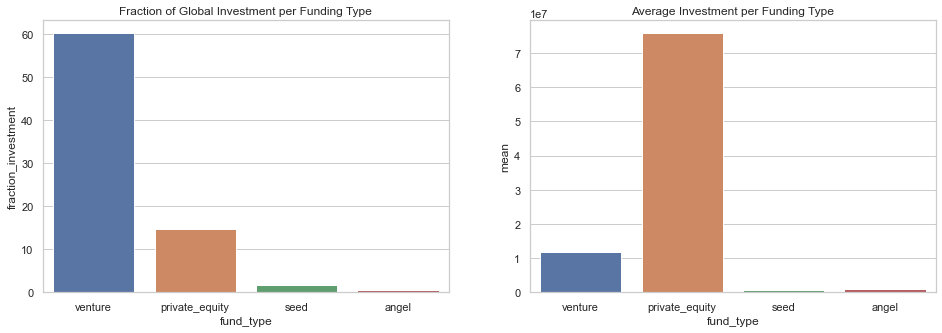

In [40]:
## A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, 
## and the average amount of investment in each funding type. 
## This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

mpl.rcParams['figure.figsize'] = (16, 5)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
sns.set(style="whitegrid")

f, axes = plt.subplots(1, 2)

# Fraction of Investment per Funding Type
sns.barplot(x='fund_type',y='fraction_investment', data=funds_agg,ax=axes[0])
axes[0].set_title('Fraction of Global Investment per Funding Type')

# Average Investment per Funding Type
sns.barplot(x='fund_type',y='mean', data=funds_agg,ax=axes[1])
plt.title('Average Investment per Funding Type')


The above chart clearly shows that Globally Venture Type funding is more prominent. Also the average investment for it is ~10 Million USD, which is in the range of Sparks Fund desired investment

Text(0.5, 1.0, 'Top 9 Countries with Investment')

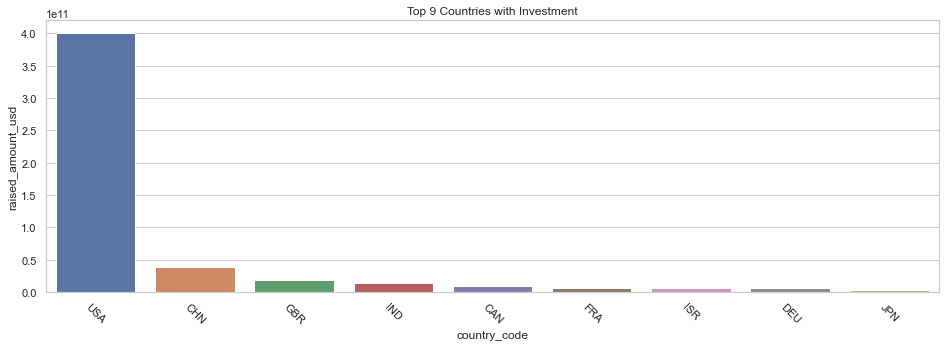

In [41]:
## A plot showing the top 9 countries against the total amount of investments of funding type FT. 
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

sns.barplot(x='country_code',y='raised_amount_usd', data=top9)
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title('Top 9 Countries with Investment')

As we know, English is not an official language in China(CHN), the Top 3  countries for investment would be - 
1. United States of America (USA)
2. Great Britain (GBR)
3. India (IND) 

In [42]:
# Filtering  the Top3 Countries & Grouping by their Main sectors, Followed by aggregation on number/count of investments
top3 = master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) &
                   (master_frame.funding_round_type == "venture") &
                   (master_frame.raised_amount_usd >= 5000000) &
                   (master_frame.raised_amount_usd <= 15000000) ]

top3_investment = top3.groupby(["country_code","main_sector"],
                               as_index=False)["raised_amount_usd"].count().sort_values(by="raised_amount_usd",
                                                                                        ascending=False)

top3_investment.rename(columns={'raised_amount_usd':'investment_rounds'},inplace=True)

In [87]:
# Creating Dataframe ofTop3 Countries with respective Top 3 Sectors

top3_country_sector = None
for country in ["USA","GBR","IND"] :
    country_sectors = top3_investment[top3_investment.country_code == country].sort_values(by="investment_rounds",
                                                                                               ascending=False).iloc[:3]
    if top3_country_sector is None : 
        top3_country_sector = country_sectors
    else :      
        top3_country_sector = top3_country_sector.append(country_sectors,ignore_index=False)
        
top3_country_sector

,country_code,main_sector,investment_rounds
22,USA,Others,2758
23,USA,"Social, Finance, Analytics, Advertising",2590
17,USA,Cleantech / Semiconductors,2192
6,GBR,Others,140
7,GBR,"Social, Finance, Analytics, Advertising",128
1,GBR,Cleantech / Semiconductors,116
14,IND,Others,103
15,IND,"Social, Finance, Analytics, Advertising",59
13,IND,"News, Search and Messaging",49


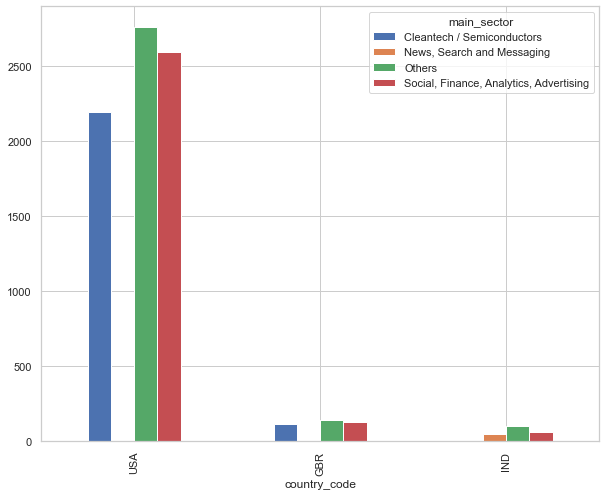

In [88]:
## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
## (for the chosen investment type FT). 
mpl.rcParams['figure.figsize'] = (10, 8)
top3_country_sector = top3_country_sector.set_index(['country_code', 'main_sector'])

# Formatting Dataframe to plot
plot_df = top3_country_sector.unstack()
plot_df.columns = plot_df.columns.droplevel()

# Sorting in Country order
plot_df = plot_df.reindex(['USA','GBR','IND'])
plot_df.plot(kind='bar')

In [84]:
top3_country_sector

investment_rounds
country_code main_sector                                               
USA          Others                                                2758
             Social, Finance, Analytics, Advertising               2590
             Cleantech / Semiconductors                            2192
GBR          Others                                                 140
             Social, Finance, Analytics, Advertising                128
             Cleantech / Semiconductors                             116
IND          Others                                                 103
             Social, Finance, Analytics, Advertising                 59
             News, Search and Messaging                              49

The above graph highlights Top 3 Sectors for each country for investment. It's interesting to see that USA & GBR have the same sector, while IND has 2 sectors common with the other two countries